# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


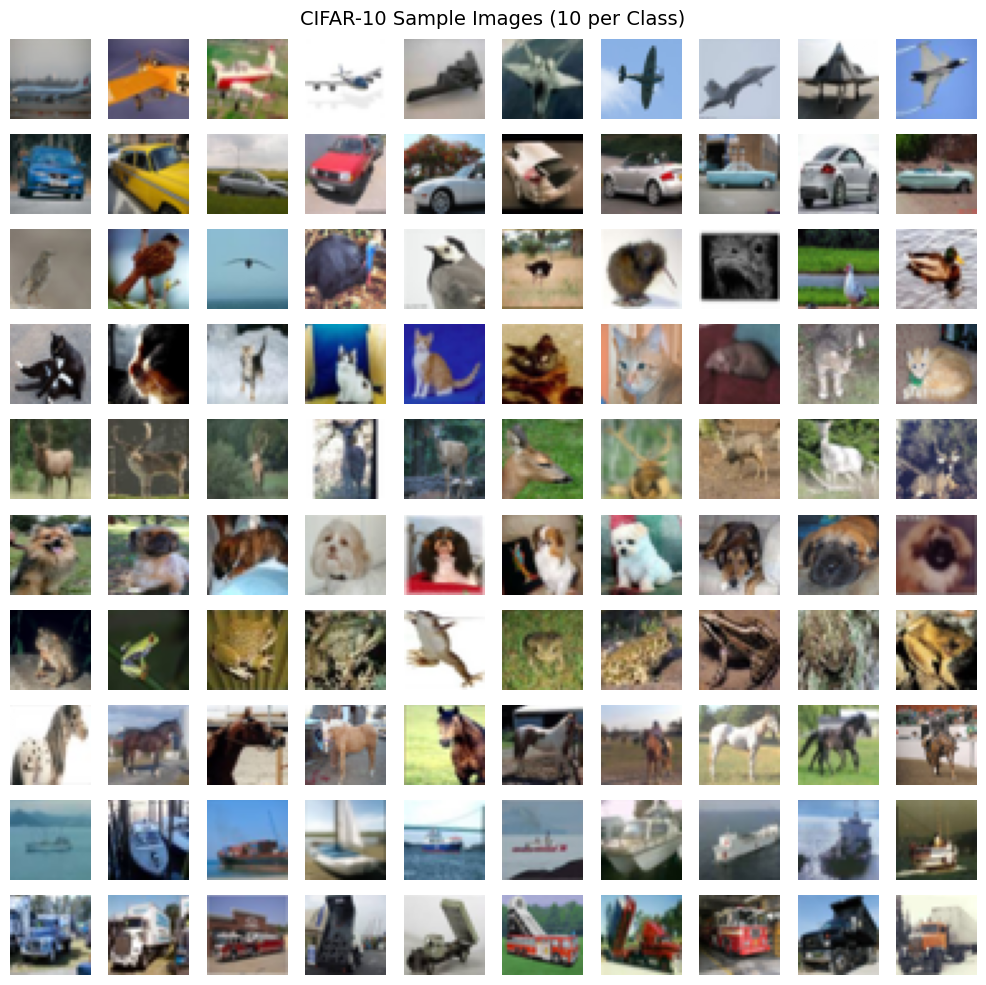

In [3]:
# CIFAR-10 class labels
class_labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Normalize images to the range [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Visualize 10 random samples from each class in a 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for class_idx in range(10):
    class_images = x_train[y_train.flatten() == class_idx]
    random_indices = np.random.choice(class_images.shape[0], 10, replace=False)

    for i, img_idx in enumerate(random_indices):
        ax = axes[class_idx, i]
        ax.imshow(class_images[img_idx])
        ax.axis('off')

# Add class labels to the left side of the grid
for ax, label in zip(axes[:, 0], class_labels):
    ax.set_ylabel(label, rotation=90, size=10, labelpad=10)

plt.suptitle("CIFAR-10 Sample Images (10 per Class)", fontsize=14)
plt.tight_layout()
plt.show()


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Clear any previous models from memory
tf.keras.backend.clear_session()

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),  # Convolutional layer
    MaxPooling2D(pool_size=(2,2)),  # Pooling layer
    Flatten(),  # Flattening the matrix into a vector
    Dense(100, activation='relu'),  # Fully connected layer with 100 units
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [6]:
from tensorflow.keras.optimizers import SGD

# Compile the model using loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the model on CIFAR-10 dataset
history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.1630 - loss: 2.2615 - val_accuracy: 0.2430 - val_loss: 2.1410
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2584 - loss: 2.1066 - val_accuracy: 0.2975 - val_loss: 2.0172
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3066 - loss: 1.9959 - val_accuracy: 0.3093 - val_loss: 1.9476
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3318 - loss: 1.9221 - val_accuracy: 0.3375 - val_loss: 1.8902
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3466 - loss: 1.8837 - val_accuracy: 0.3581 - val_loss: 1.8520
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3568 - loss: 1.8504 - val_accuracy: 0.3671 - val_loss: 1.8275
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3651 - loss: 1.8241 - val_accuracy: 0.3707 - val_loss: 1.8016
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3756 - loss: 1.7984 - val_accuracy: 0.3825 - val_los

  Plot the cross entropy loss curve and the accuracy curve

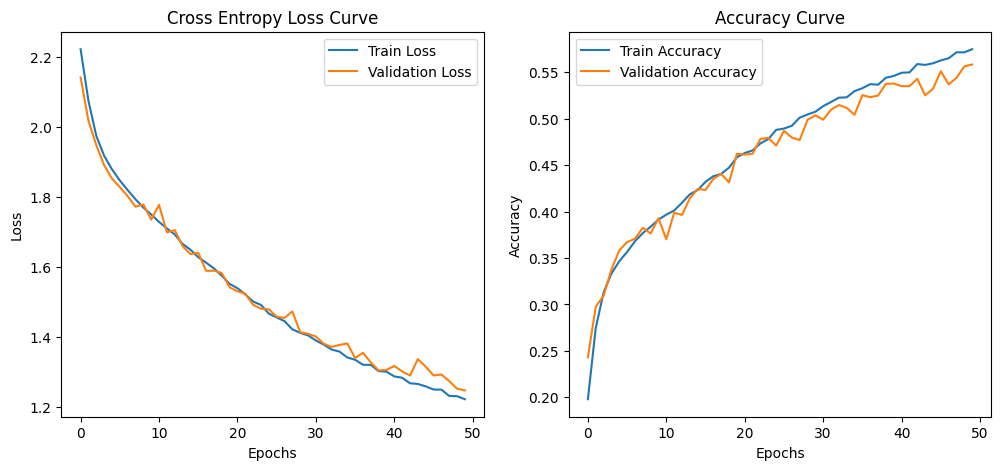

In [7]:
import matplotlib.pyplot as plt

# Plot Cross Entropy Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()




```
# This is formatted as code
```

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input
 >change the size of input to 64 x 64


In [13]:
from keras.backend import clear_session
clear_session()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing

# Clear any previous models from memory
tf.keras.backend.clear_session()

# Define a VGG-like model for CIFAR-10 with input size 64x64
model_vgg = Sequential([
    # Resize input to 64x64
    Resizing(64, 64),

    # First two convolutional layers with 32 filters (3x3)
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),

    # Max pooling layer
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the matrix into a vector
    Flatten(),

    # Fully connected layer with 128 units
    Dense(128, activation='relu'),

    # Output layer with 10 classes
    Dense(10, activation='softmax')
])

# Compile the model
model_vgg.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Print the model summary
model_vgg.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.1964 - loss: 2.2113 - val_accuracy: 0.2612 - val_loss: 2.0424
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2957 - loss: 1.9913 - val_accuracy: 0.3326 - val_loss: 1.8842
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3412 - loss: 1.8726 - val_accuracy: 0.3517 - val_loss: 1.8187
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3692 - loss: 1.7939 - val_accuracy: 0.3688 - val_loss: 1.7661
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3904 - loss: 1.7380 - val_accuracy: 0.3915 - val_loss: 1.7143
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3989 - loss: 1.7134 - val_accuracy: 0.4145 - val_loss: 1.6709
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.4108 - loss: 1.6782 - val_accuracy: 0.4240 - val_loss: 1.6488
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.4285 - loss: 1.6371 - val_accuracy: 0.4415 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,205,868 (16.04 MB)

 Trainable params: 4,205,866 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)



```
# This is formatted as code
```

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [15]:
# Compile the model using categorical_crossentropy loss, SGD optimizer, and accuracy metric
model_vgg.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model on CIFAR-10 dataset for 50 epochs with a batch size of 512
history_vgg = model_vgg.fit(x_train, y_train_one_hot, epochs=50, batch_size=512, validation_data=(x_test, y_test_one_hot))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.6471 - loss: 1.0239 - val_accuracy: 0.5582 - val_loss: 1.2713
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6518 - loss: 1.0063 - val_accuracy: 0.5819 - val_loss: 1.2063
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6546 - loss: 1.0011 - val_accuracy: 0.5853 - val_loss: 1.2004
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6585 - loss: 0.9915 - val_accuracy: 0.5699 - val_loss: 1.2286
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6568 - loss: 0.9834 - val_accuracy: 0.5818 - val_loss: 1.1884
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6601 - loss: 0.9789 - val_accuracy: 0.5906 - val_loss: 1.1836
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6704 - loss: 0.9492 - val_accuracy: 0.5878 - val_loss: 1.1836
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6740 - loss: 0.9422 - val_accuracy: 0.5710 - v

* italicized text   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


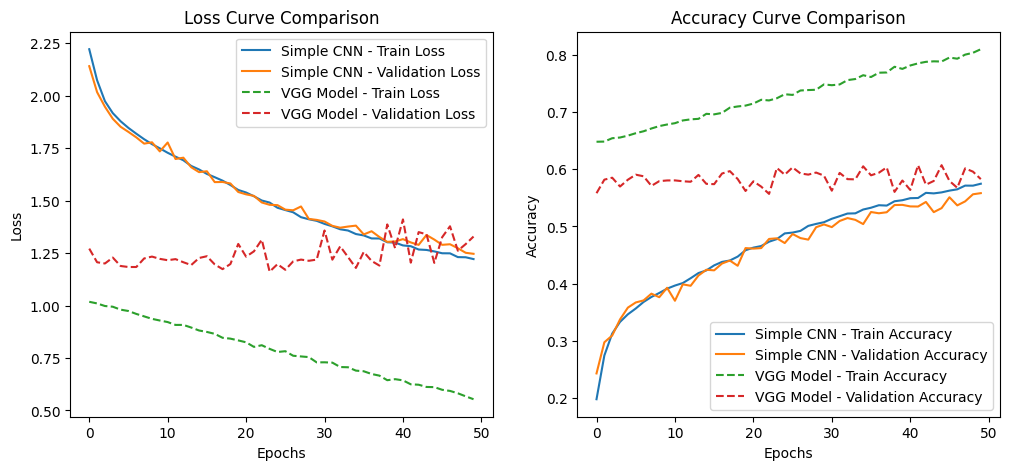

In [16]:
import matplotlib.pyplot as plt

# Plot Loss Curves for both models
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Simple CNN - Train Loss')
plt.plot(history.history['val_loss'], label='Simple CNN - Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model - Train Loss', linestyle='dashed')
plt.plot(history_vgg.history['val_loss'], label='VGG Model - Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()

# Plot Accuracy Curves for both models
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Simple CNN - Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Simple CNN - Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model - Train Accuracy', linestyle='dashed')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model - Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve Comparison')
plt.legend()

plt.show()




```
`# This is formatted as code`
```

**Comment on the observation**

- VGG model learns faster and achieves higher training accuracy (~80%) but suffers from overfitting (unstable validation loss, lower validation accuracy ~60%).
-  Simple CNN generalizes better but learns more slowly with lower accuracy (~60%).
- To improve VGG, use data augmentation, dropout, and regularization to reduce overfitting.
...

   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


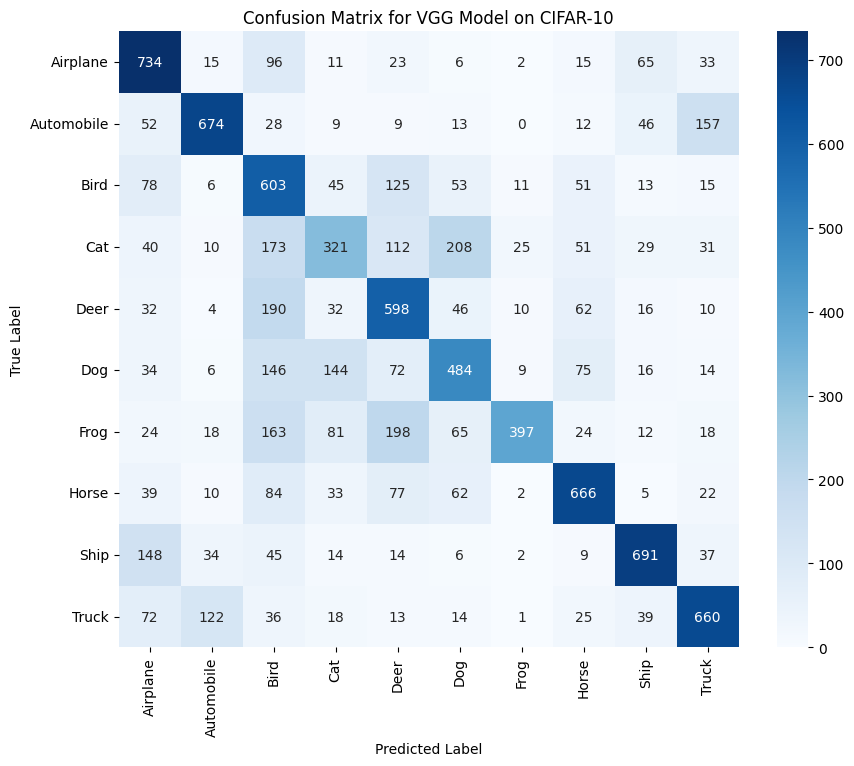

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the output for the test set using the VGG model
y_pred = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test_one_hot, axis=1)  # True class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model on CIFAR-10')
plt.show()


**Comment here :**

- Best accuracy for Airplanes, Ships, and Horses
- High confusion between Birds & Cats, Dogs & Cats, and Automobiles & Trucks
- Frogs & Deer have significant misclassification
- Improvements: Use data augmentation, regularization, or fine-tuning for better accuracy


 Print the test accuracy for the trained model.

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test_one_hot)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5815 - loss: 1.3259
Test Accuracy: 58.28%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [19]:
from keras.backend import clear_session
clear_session()


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing

# Clear any previous models from memory
tf.keras.backend.clear_session()

# Define a VGG-like model for CIFAR-10 with input size 64x64
model_vgg = Sequential([
    # Resize input to 64x64
    Resizing(64, 64),

    # First two convolutional layers with 64 filters (3x3)
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Next two convolutional layers with 128 filters (3x3)
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Final two convolutional layers with 256 filters (3x3)
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten the matrix into a vector
    Flatten(),

    # Fully connected layer with 128 units
    Dense(128, activation='relu'),

    # Output layer with 10 classes
    Dense(10, activation='softmax')
])

# Compile the model
model_vgg.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Print the model summary
model_vgg.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 626ms/step - accuracy: 0.1034 - loss: 2.3026 - val_accuracy: 0.1563 - val_loss: 2.2988
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.1575 - loss: 2.2975 - val_accuracy: 0.1621 - val_loss: 2.2916
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.1681 - loss: 2.2875 - val_accuracy: 0.2034 - val_loss: 2.2643
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.2045 - loss: 2.2369 - val_accuracy: 0.2648 - val_loss: 2.1085
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.2449 - loss: 2.1051 - val_accuracy: 0.2457 - val_loss: 2.0861
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.2775 - loss: 2.0160 - val_accuracy: 0.3141 - val_loss: 1.9275
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.3065 - loss: 1.9546 - val_accuracy: 0.3344 - val_loss: 1.8555
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.3321 - loss: 1.8910 - val_accu

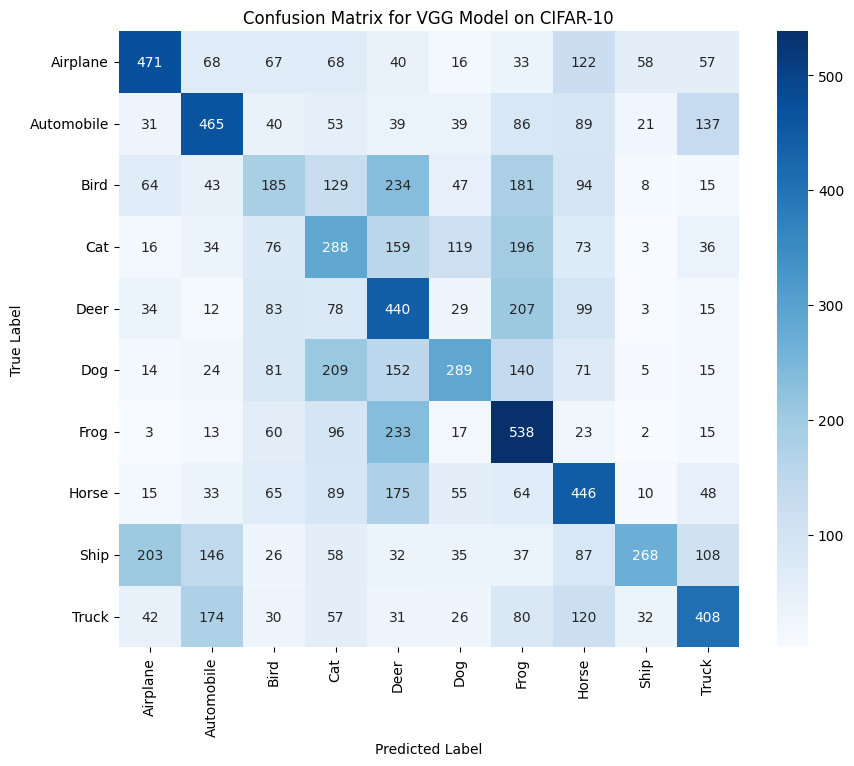

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compile the model using categorical_crossentropy loss, SGD optimizer, and accuracy metric
model_vgg.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model on CIFAR-10 dataset for 10 epochs with a batch size of 512
history_vgg = model_vgg.fit(x_train, y_train_one_hot, epochs=10, batch_size=512, validation_data=(x_test, y_test_one_hot))

# Predict the outputs for the test set
y_pred = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probability values to class labels
y_true = np.argmax(y_test_one_hot, axis=1)  # Extract true class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model on CIFAR-10')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_ Activation functions introduce non-linearity to the network, allowing it to learn complex patterns. Without activation functions, neural networks would behave like simple linear regression models and fail to capture intricate relationships in the data. They help decide which neurons should be activated and propagate meaningful signals through the network.


2 - Key Differences between sigmoid and softmax:
  - **Sigmoid Activation Function:**
     - Outputs values between 0 and 1.
     - Used for **binary classification**.
     - Can be applied to each neuron independently.
   - **Softmax Activation Function:**
     - Outputs a probability distribution across multiple classes (values sum to 1).
     - Used for **multi-class classification**.
     - Helps in selecting the most likely class.




3 - Key Differences between categorical crossentropy and binary crossentropy loss:
 - **Binary Crossentropy:**
     - Used when there are **only two classes** (e.g., yes/no, 0/1).
     - Applies a **sigmoid** activation function.
   - **Categorical Crossentropy:**
     - Used when there are **multiple classes** (e.g., CIFAR-10 with 10 classes).
     - Works with **softmax** activation to assign probabilities to different categories.
